In [1]:
import os
import sys
sys.path.append('../../Project_Clustering')

import numpy as np
import pandas as pd
import pickle 
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import myClusterPackage as myPack
from sklearn.mixture import GaussianMixture
from mySpectralClustering import spectralFeatures


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import time

## Extracting point cloud features

In [2]:
#face_db = []
#face_list = []
#labels = []


#data_folder = os.listdir("../3DFACEPAPER/Data/") # list of all subfolder within Data folder
#data_folder.remove('.DS_Store') 


#for k, expressions in enumerate (data_folder): # will loop within the main folder
   
    # Accessing each subfolder (expression) within the data folder  
#    path =  "../3DFACEPAPER/Data/" + expressions +"/"
#    face_names = os.listdir(path)    # list of all file names within subfolder
    
   
#    for face in face_names: # will loop within the subfolder
        
#        if not face.startswith('.'):
       # import the face and face labels
#            file_name = path + face
        
#            df_face = pd.read_csv(file_name)
#            face_list.append (df_face.values)
#            labels.append (expressions)
            

#pickle.dump(face_list, open('face_data_full','wb'))
#pickle.dump (labels, open('face_labels_full', 'wb'))


    

In [2]:
face_list = pickle.load(open('face_data_full', 'rb'))
face_labels = pickle.load(open('face_labels_full', 'rb'))

all_patch_data = []
n_face = len(face_list)

#%matplotlib tk


#fig02 = plt.figure(figsize=(15,8))
#ax = Axes3D(fig02)   
#print (face_list[40])
#for k in range (10):
#    mvpk = np.where(face_list[k][:,2]==max(face_list[k][:,2]))
    #mvpk = 
#    ax.scatter(face_list[k][:,0]-face_list[k][mvpk,0], 
#               face_list[k][:,1]-face_list[k][mvpk,1],
#               face_list[k][:,2]- face_list[k][mvpk,2])

km01 = KMeans(
        n_clusters=8, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=10
    )

mvpk = np.where(face_list[0][:,2]== max(face_list[0][:,2]))
faceo = face_list[0] - face_list[0][mvpk]
    
    
km01 = km01.fit(faceo)
init_centroids = km01.cluster_centers_

#ax.scatter(init_centroids[:,0], init_centroids[:,1], init_centroids[:,2],'r', s=1000)


In [3]:
    
for i,face in enumerate(face_list):
    

    km = KMeans(
        n_clusters=8, init=init_centroids,
        n_init=1, max_iter=300, 
        tol=1e-04, random_state=10
    )

    mvpk = np.where(face[:,2]== max(face[:,2]))
    
    face = face - face[mvpk[0][0]]

    segments = km.fit_predict(face)
    n_patch = len(np.unique(segments)) 
    centroids, _ = myPack.get_centroids(face, segments)
    total_features = []
   
    for j in range (n_patch):
        
        patch_features = []
        clusterLabels = []
        featureLabels = []
        
        patch = face[segments == j]
        
        delta_patch = patch - centroids [j] 
        
  #      transFeature = spectralFeatures (delta_patch,n_dim = 2, n_neighbor = 10)
   #     df_2Col = transFeature.values
    
        
        ## Applying GMM on each patch
        gmm = GaussianMixture(n_components = 3, covariance_type= 'diag',random_state=10)
        patch_gmm = gmm.fit(delta_patch)
        patch_w = patch_gmm.weights_
        patch_mu = patch_gmm.means_
        patch_sigma = patch_gmm.covariances_
        
        ## creating data frame for testing
   #     n_features = len(patch_w) + len(patch_mu)*len(patch_mu[1]) #+ len(patch_sigma)*len(patch_sigma[1])
    
        # Features extracted from a single patch
        # 3 + 6 + 6 --> repeated across 8 patches
        patch_features = list(patch_w) + list(patch_mu.ravel())+ list(patch_sigma.ravel())
        
        # concatenating from all patches
        total_features = total_features + patch_features
    # adding features from all patches to the face database 
    all_patch_data.append (total_features)

df_3D_face = pd.DataFrame({'Patch_Features':all_patch_data,'Classes':face_labels})                                      

# Encoding class labels 
le = preprocessing.LabelEncoder() 
df_3D_face['Labels']= le.fit_transform(df_3D_face['Classes']) 
 

In [5]:
df_3D_face['Patch_Features'][0]

[0.3328211381559382,
 0.37704958623940454,
 0.2901292756046575,
 -2.429664337248242,
 -19.141228686204755,
 -8.330787182277524,
 -8.325801636546503,
 7.004395083814522,
 12.738603669623801,
 13.053152382125408,
 7.34377317013639,
 -9.242581121266696,
 44.03246021208396,
 79.22267888378309,
 71.4287413609013,
 78.94638587145612,
 109.19692814407637,
 21.433726938756255,
 23.491275748332132,
 90.91977750900136,
 73.71612646707364,
 0.18880999545543878,
 0.6021872321545583,
 0.20900277239000242,
 4.982145103125442,
 23.286133188228845,
 0.2966281561103865,
 6.439289279291695,
 -5.259660113536556,
 5.0130475687859795,
 -18.817810661688704,
 0.33387205017804356,
 -7.135959048429665,
 113.23000481844616,
 44.18123993831432,
 30.382634189744824,
 153.89376190394157,
 163.5599109198728,
 55.73684214406087,
 35.55722186023445,
 221.82075186752482,
 5.139069778237693,
 0.3140430604884488,
 0.33296789634822277,
 0.3529890431633284,
 -8.03112652644773,
 -2.700937067364,
 -19.63282908974558,
 -0.43

In [5]:
df_3D_face.to_pickle("all_face_features_lar.pkl")


#df_3D_face ['Classes'].unique()
df_3D_face 


#print(mvpk[0][0])

,Patch_Features,Classes,Labels
0,"[0.33282113815593856, 0.37704958623940416, 0.2...",Anger,0
1,"[0.3538273789377732, 0.3064868438879217, 0.339...",Anger,0
2,"[0.43459934616669715, 0.35090533145137653, 0.2...",Anger,0
3,"[0.3364229421897343, 0.22622633878132825, 0.43...",Anger,0
4,"[0.34113065973618883, 0.3707977888684269, 0.28...",Anger,0
...,...,...,...
345,"[0.3248686098606952, 0.2957859734759584, 0.379...",Surprise,6
346,"[0.33798121856776636, 0.4445973741716737, 0.21...",Surprise,6
347,"[0.30435864313977046, 0.31491927686861704, 0.3...",Surprise,6
348,"[0.32154508676044374, 0.2990715812150307, 0.37...",Surprise,6


In [6]:
#Cut off 0.001
#fea_indx = np.array([ 0, 1, 2, 3, 5, 7, 15, 16, 17, 18, 20, 21, 22, 30, 31, 
#       32, 36, 45, 46, 47, 49, 51, 60, 61, 62, 63, 64, 65, 66, 67, 75, 76, 
#       77, 78, 80, 82, 90, 91, 94, 105, 106, 107, 108, 110, 111, 112, 113])

#Cut off 0.002
#fea_indx = np.array([ 0, 1, 2, 15, 16, 17, 30, 31, 32, 
#       36, 45, 46, 47, 61, 75, 77, 90, 91, 105, 106, 107])

#fea_indx =np.array([ 1, 2, 15, 30, 31 , 46, 77, 91, 105, 106])

# Load pickle file
df_3D_face = pd.read_pickle("all_face_features_lar.pkl")

xx = df_3D_face['Patch_Features'].to_list() 

data_mat = np.array (xx)

face_labels = df_3D_face['Labels'].to_list() 

n_labels = len(np.unique(face_labels)) 

#dataMatrix = data_mat   # [:, fea_indx]

data_matrix = data_mat# preprocessing.scale(data_mat)

print (len(data_matrix[1]))

df_3D_face

168


,Patch_Features,Classes,Labels
0,"[0.33282113815593856, 0.37704958623940416, 0.2...",Anger,0
1,"[0.3538273789377732, 0.3064868438879217, 0.339...",Anger,0
2,"[0.43459934616669715, 0.35090533145137653, 0.2...",Anger,0
3,"[0.3364229421897343, 0.22622633878132825, 0.43...",Anger,0
4,"[0.34113065973618883, 0.3707977888684269, 0.28...",Anger,0
...,...,...,...
345,"[0.3248686098606952, 0.2957859734759584, 0.379...",Surprise,6
346,"[0.33798121856776636, 0.4445973741716737, 0.21...",Surprise,6
347,"[0.30435864313977046, 0.31491927686861704, 0.3...",Surprise,6
348,"[0.32154508676044374, 0.2990715812150307, 0.37...",Surprise,6


Explained variation per principal component: [0.08996826 0.06206722 0.05601941 0.05107384 0.04904495]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 350 samples in 0.005s...
[t-SNE] Computed neighbors for 350 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 350 / 350
[t-SNE] Mean sigma: 136.430199
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.149826
[t-SNE] KL divergence after 300 iterations: 2.064009
t-SNE done! Time elapsed: 0.19302916526794434 seconds
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 350 samples in 0.001s...
[t-SNE] Computed neighbors for 350 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 350 / 350
[t-SNE] Mean sigma: 12.084659
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.071724
[t-SNE] KL divergence after 300 iterations: 0.822541


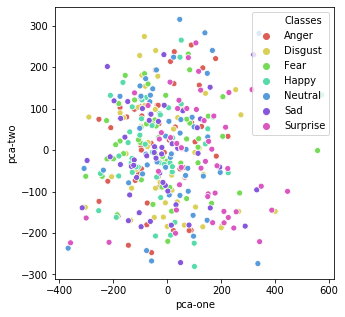

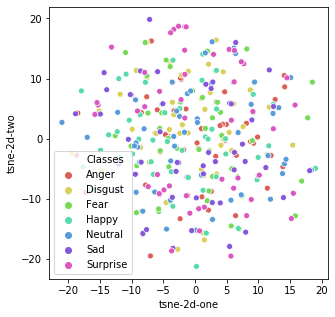

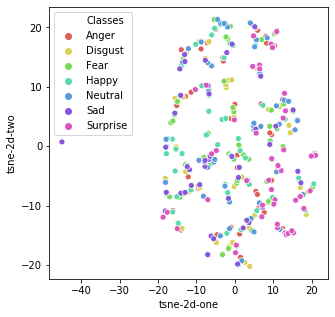

In [7]:
df = df_3D_face.copy()

# Performing PCA on raw data 
pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_matrix)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Classes",
    palette=sns.color_palette("hls", n_labels),
    data=df,
    legend="full",
    alpha=1.0
)

# Performing t-SNE on raw data
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(data_matrix)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Classes",
    palette=sns.color_palette("hls", n_labels),
    data=df,
    legend="full",
    alpha=1.0
)

# Performing t-SNE on PCA data 
tsne_results = tsne.fit_transform(pca_result[:,0:3])
#print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Classes",
    palette=sns.color_palette("hls", n_labels),
    data=df,
    legend="full",
    alpha=1.0
)



In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn import ( pipeline, preprocessing, linear_model)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


#70% taining, 20% validating 10% testing
# 10x2 nested cross-validation 
# K-fold cross-validation - 1 fold -, 2-fold, average 
# 80% - 20%

print ('Number of features', len(data_matrix[1]))

# 10-fold cross-validation
# Each fold test - 35, train - 315
#Kaggle 
nfolds = 10
clf = GradientBoostingClassifier(n_estimators= 5,
                         #       class_weight = "balanced",
                                random_state=42#,cache_size=20000
                               # n_jobs=1
                               )

pca = PCA ()   

pipe = pipeline.Pipeline([  ('scl', preprocessing.StandardScaler()),
                          # ('pca', pca),
                            ('clf', clf) 
                           
                         
                         ])
    
param_grid = {  #"pca__n_components": [5, 10, 15, 30, 40],
                      "clf__n_estimators":[10, 20, 30, 40, 50, 80,100],
              "clf__min_samples_split": [2, 5, 10, 15],
            "clf__learning_rate":[0.1, .02, 0.5],
             "clf__max_depth": [2, 5, 10, 15],
             }
    
    
        
kfold = StratifiedKFold(n_splits= nfolds, random_state= 42, shuffle=True)
    

 

fold_auc = []
testPredict = []
Stest = []

for k, (train, test) in enumerate (kfold.split(data_matrix,face_labels)):
         
        # Accumulating training fold data and labels
        trfold = [data_matrix [x] for x in train]
        trSen  = [face_labels[x] for x in train]
        
   
        # Accumulating test fold data and labels
        tsfold = [data_matrix[x] for x in test]
        tsSen = [face_labels[x] for x in test]
        
        
        
        gsModel = GridSearchCV(estimator=pipe, 
                                  param_grid = param_grid, n_jobs=1,
                                  scoring = 'accuracy', cv = 2)
         
       
        
        # training the model 
        trModel = gsModel.fit(trfold,trSen)
        
        bestModel = trModel.best_estimator_
        
        print (bestModel)
        
        testPred =  bestModel.predict(tsfold)
        
        ##### Predict Probability ############
        
        probas =  bestModel.predict_proba(tsfold)
        
        
        roc_auc =[]
        for t in range (len(np.unique(face_labels))):
            
            fpr, tpr, _ = roc_curve(tsSen,probas[:,t], pos_label=t)        
            roc_auc.append( auc(fpr,tpr))
            
        
        
        fold_auc.append (np.mean(roc_auc))
        
        
        testPredict.extend (testPred)
        Stest.extend (tsSen)
        
       # print ('Accuracy is:',accuracy_score( tsSen, testPred))
    
#    print(datetime.datetime.now().time())
print ('Mean 10-fold AUC', np.mean(fold_auc))
print ('Std 10-fold AUC', np.std(fold_auc))
    
#    return Stest, testPredict  

Number of features 168
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=40,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.02, loss='deviance',
                                            max_depth=2, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=10

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=30,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=2, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                       

['Anger' 'Disgust' 'Fear' 'Happy' 'Neutral' 'Sad' 'Surprise']
• Overall accuracy of the prediction/classifier model:  0.20285714285714285


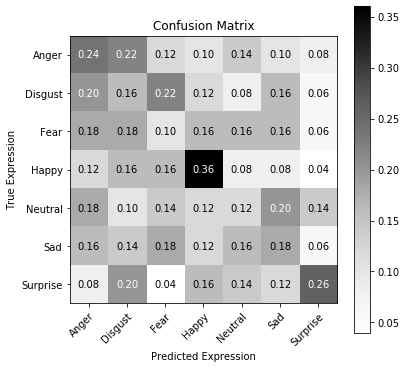

In [11]:
def showAccuracy (fileName,Stest, testPredict):
    
    
    #Stest = tsSen
    cMatrix = confusion_matrix(Stest,testPredict)

    # Converts each value in the matrix into a percentage/float-value
    cMatrix = cMatrix.astype('float') / cMatrix.sum(axis=1)[:, np.newaxis]

    # Convert this list into a numpy array
    Sent_test = np.asarray(Stest, dtype=np.int) 


    fig, ax = plt.subplots(figsize=(6, 6))

    # The tick labels for the box-plot
    sent_label = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 
    sent_label = np.asarray(sent_label, dtype=np.str)
    sent_label = sent_label[unique_labels(Stest, testPredict)]
    
    print (sent_label)

    # (cmap = plt.cm.Greens) represents the colors/shades used for the plot
    im = ax.imshow(cMatrix, interpolation='nearest', cmap=plt.cm.Greys)
    ax.figure.colorbar(im, ax=ax)
    
    # Configures the labels and tick marks of the box-plot


    ax.set(xticks=np.arange(cMatrix.shape[0] ),
       yticks=np.arange(cMatrix.shape[0]),
       
       # Label the ticks with their respective sentiment
       xticklabels=sent_label, yticklabels= sent_label,
       
       # Label the sides
       title='Confusion Matrix',
       ylabel='True Expression',
       xlabel='Predicted Expression')
   
    ax.set_ylim(6.5,-0.5) 
    # Rotates and aligns the tick labels to be upright and centered
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cMatrix.max() / 2.

    for i in range(cMatrix.shape[0]):
        for j in range(cMatrix.shape[0]):
            ax.text(j, i, format(cMatrix[i, j], fmt),
                ha="center", va="center",
                color="white" if cMatrix[i, j] > thresh else "black")

    # A report of something, not sure though...
  #  print(classification_report(Stest,testPredict))  

    # The overall accuracy of our test
    print('• Overall accuracy of the prediction/classifier model: ', accuracy_score(Sent_test, testPredict))

    # Prints the fancy box-plot
    #boxPlot.tight_layout()
   # ax.axis('off')

    fig.savefig(fileName, bbox_inches='tight', dpi=150)

showAccuracy ('confusion_01.pdf',Stest, testPredict)